### Regression Models with Random Forest

In [2]:
import pandas as pd
! python -m pip install seaborn
! python -m pip install sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.8 MB/s eta 0:00:0000:0100:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=c03aab405452cc5fa0dca49de9b22ccc73a068160b6d325291f9e75cb46715b7
  Stored in directory: /Users/rfinnegan/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [3]:
#load data
df = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
#Input features - 881 for covid
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Output Feature - Y (pIC50)
Y = df.pIC50
Y

Y.shape
X.shape

(133, 881)

In [7]:
#Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(133, 200)

### Split data for training and testing model

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((106, 200), (106,))

In [9]:
X_test.shape, Y_test.shape

((27, 200), (27,))

### Build regression model using RF

In [15]:
import numpy as np
#set seed for consist results
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.38158239483224365

In [16]:
Y_pred = model.predict(X_test)

### Scatterplot of actual versus predicted pIC50

In [21]:
Y_test.describe()

count    27.000000
mean      4.551215
std       1.724997
min       1.000000
25%       4.250845
50%       4.869666
75%       5.721849
max       7.187087
Name: pIC50, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

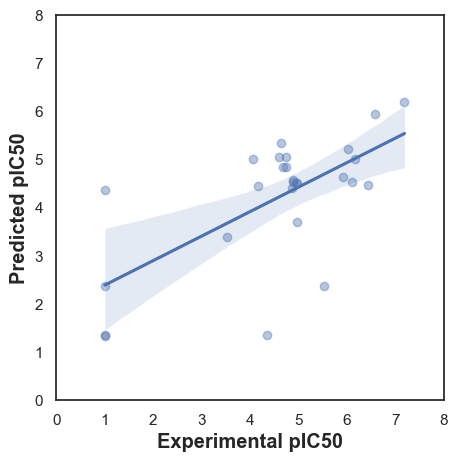

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.figure.set_size_inches(5, 5)
plt.show